# Predicting the value of players in FIFA 19 using KNN
---

# 1. Import and preview dataset


In [1]:
import pandas as pd

# Specify the file path and encoding
file_path = 'last_ten_years_basketball data.csv'
encoding = 'latin1'  # or 'ISO-8859-1'

try:
    # Attempt to read the CSV file
    data = pd.read_csv(file_path, encoding=encoding)

    # Display the first few rows to verify
    print(data.head())

    # Further data processing or analysis can follow here

except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}. Try specifying a different encoding.")
except Exception as e:
    print(f"Error: {e}")



    Id         Player Club   Age  Height  Weight  \
0  1.0    A.J. Lawson  DAL  23.0  06-Jun   179.0   
1  2.0       AJ Green  MIL  24.0  06-Apr   190.0   
2  3.0     AJ Griffin  ATL  20.0  06-Jun   220.0   
3  4.0   Aaron Gordon  DEN  28.0  06-Aug   235.0   
4  5.0  Aaron Holiday  HOU  27.0     6-0   185.0   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  ...  Composure Marking  \
0  https://cdn.sofifa.org/flags/52.png       94  ...       96.0    33.0   
1  https://cdn.sofifa.org/flags/38.png       94  ...       95.0    28.0   
2  https://cdn.sofifa.org/flags/54.png       92  ...       94.0    27.0

<ipython-input-1-10386bcfc842>:9: DtypeWarning: Columns (1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding=encoding)


In [2]:
#Check number of columns in dataframe
num_col = len(data.columns)
print("Number of columns in dataframe:",num_col)

Number of columns in dataframe: 91


In [3]:
#Unhide all columns and then preview first 5 rows of dataframe to indentify columns
pd.options.display.max_columns = num_col
data.head()

,Id,Player,Club,Age,Height,Weight,Photo,Nationality,Flag,Overall,Potential,Club.1,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height.1,Weight.1,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,1.0,A.J. Lawson,DAL,23.0,06-Jun,179.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,?110.5M,?565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,?226.5M
1,2.0,AJ Green,MIL,24.0,06-Apr,190.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,?77M,?405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,?127.1M
2,3.0,AJ Griffin,ATL,20.0,06-Jun,220.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,?118.5M,?290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,?228.1M
3,4.0,Aaron Gordon,DEN,28.0,06-Aug,235.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,?72M,?260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,?138.6M
4,5.0,Aaron Holiday,HOU,27.0,6-0,185.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,?102M,?355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,?196.4M


In [4]:
#Assign all columns to variable and then preview columns
stats_columns = data.columns
stats_columns

Index(['Id', 'Player', 'Club', 'Age', 'Height', 'Weight', 'Photo',
       'Nationality', 'Flag', 'Overall', 'Potential', 'Club.1', 'Club Logo',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height.1', 'Weight.1', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Stan

# 2. Data Cleaning


In [5]:
# Assuming 'data' is your original dataframe
dropped_cols = [ 'Photo', 'Nationality', 'Flag', 'Club Logo', 'Real Face', 'Body Type']
data_updated = data.drop(dropped_cols, axis=1)

# Print preview of the updated dataframe
print(data_updated.head())

    Id         Player Club   Age  Height  Weight  Overall  Potential  \
0  1.0    A.J. Lawson  DAL  23.0  06-Jun   179.0       94         94   
1  2.0       AJ Green  MIL  24.0  06-Apr   190.0       94         94   
2  3.0     AJ Griffin  ATL  20.0  06-Jun   220.0       92         93   
3  4.0   Aaron Gordon  DEN  28.0  06-Aug   235.0       91         93   
4  5.0  Aaron Holiday  HOU  27.0     6-0   185.0       91         92   

                Club.1    Value   Wage  Special Preferred Foot  \
0         FC Barcelona  ?110.5M  ?565K     2202           Left   
1             Juventus     ?77M  ?405K     2228          Right   
2  Paris Saint-Germain  ?118.5M  ?290K     2143          Right   
3    Manchester United     ?72M  ?260K     1471          Right   
4      Manchester City    ?102M  ?355K     2281          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate Position  \
0                       5.0        4.0          4.0  Medium/ Medium       RF   
1         

In [6]:
#Drop all rows of players with missing position information:
data_na_pos_removed = data_updated.dropna(subset = ['Position'])
# data_na_pos_removed
print("Rows in dataframe before removing missing position information:",len(data_updated))
print("Rows in dataframe after dropping rows with missing position information:",len(data_na_pos_removed))

Rows in dataframe before removing missing position information: 18207
Rows in dataframe after dropping rows with missing position information: 18147


In [7]:
#Function to check for missing information in any column:
def check_na_vals(dataframe):
    return dataframe[dataframe.isna().any(axis = 1)]

rows_with_na = check_na_vals(data_na_pos_removed)

In [8]:
#Function to use display options to show only 10 rows but also indicate number of rows below dataframe
def display_10_rows(dataframe):
    with pd.option_context('display.max_rows', 10):
            display(dataframe)

display_10_rows(rows_with_na)

,Id,Player,Club,Age,Height,Weight,Overall,Potential,Club.1,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height.1,Weight.1,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,1.0,A.J. Lawson,DAL,23.0,06-Jun,179.0,94,94,FC Barcelona,?110.5M,?565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,?226.5M
1,2.0,AJ Green,MIL,24.0,06-Apr,190.0,94,94,Juventus,?77M,?405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,?127.1M
2,3.0,AJ Griffin,ATL,20.0,06-Jun,220.0,92,93,Paris Saint-Germain,?118.5M,?290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,?228.1M
3,4.0,Aaron Gordon,DEN,28.0,06-Aug,235.0,91,93,Manchester United,?72M,?260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,?138.6M
4,5.0,Aaron Holiday,HOU,27.0,6-0,185.0,91,92,Manchester City,?102M,?355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,?196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,NaN,NaN,NaN,NaN,NaN,NaN,47,65,Crewe Alexandra,?60K,?1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,?143K
18203,NaN,NaN,NaN,NaN,NaN,NaN,47,63,Trelleborgs FF,?60K,?1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,

In [9]:
#Remove Joined and Loaned columns
data_cols_removed = data_na_pos_removed.drop(['Joined','Loaned From'], axis = 1)

#Check for missing information in any other columns:
rows_with_na = check_na_vals(data_cols_removed)

#See first 10 rows of dataframe containing na values:
display_10_rows(rows_with_na)

,Id,Player,Club,Age,Height,Weight,Overall,Potential,Club.1,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height.1,Weight.1,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,4.0,Aaron Gordon,DEN,28.0,06-Aug,235.0,91,93,Manchester United,?72M,?260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,?138.6M
9,10.0,Admiral Schofield,ORL,27.0,06-May,241.0,90,93,Atltico Madrid,?68M,?94K,1331,Right,3.0,3.0,1.0,Medium/ Medium,GK,1.0,2021,6'2,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,?144.5M
18,19.0,Amari Bailey,CHA,20.0,06-Mar,185.0,89,92,FC Barcelona,?58M,?240K,1328,Right,3.0,4.0,1.0,Medium/ Medium,GK,22.0,2022,6'2,187lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,?123.3M
19,20.0,Amen Thompson,HOU,21.0,06-Jul,200.0,89,90,Real Madrid,?53.5M,?240K,1311,Left,4.0,2.0,1.0,Medium/ Medium,GK,1.0,2024,6'6,212lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,?113.7M
22,23.0,Andre Jackson Jr.,MIL,22.0,06-Jun,209.0,89,89,FC Bayern Mnchen,?38M,?130K,1473,Right,5.0,4.0,1.0,Medium/ Medium,GK,1.0,2021,6'4,203lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,?62.7M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,NaN,NaN,NaN,NaN,NaN,NaN,47,65,Crewe Alexandra,?60K,?1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,CM,22.0,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,?143K
18203,NaN,NaN,NaN,NaN,NaN,NaN,47,63,Trelleborgs FF,?60K,?1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,ST,21.0,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,?113K
18204,NaN,NaN,NaN,NaN,NaN,NaN,47,67,C

In [10]:
#Remove rating-by-position columns
remove_cols = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',
                    'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
data_positions_removed = data_cols_removed.drop(columns = remove_cols)

#Check for missing information in any other columns:
rows_with_na = check_na_vals(data_positions_removed)

#See first 10 rows of dataframe containing na values:
display_10_rows(rows_with_na)

,Id,Player,Club,Age,Height,Weight,Overall,Potential,Club.1,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height.1,Weight.1,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,29.0,Anthony Davis,LAL,31.0,06-Oct,253.0,88,89,FC Bayern Mnchen,?69.5M,?315K,2171,Left,4.0,3.0,4.0,Medium/ Medium,LAM,10.0,"Jun 30, 2019",5'11,172lbs,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0,76.0,86.0,54.0,70.0,68.0,92.0,64.0,55.0,80.0,89.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,39.0,Ben Simmons,BKN,27.0,06-Oct,240.0,88,88,Milan,?57M,?245K,1965,Right,4.0,4.0,3.0,High/ Medium,LS,9.0,"Jun 30, 2019",6'1,196lbs,68.0,92.0,80.0,75.0,90.0,84.0,74.0,62.0,59.0,85.0,73.0,73.0,75.0,86.0,69.0,86.0,79.0,70.0,85.0,80.0,50.0,20.0,92.0,74.0,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,92.0,Colby Jones,SAC,22.0,06-Jun,207.0,85,85,Guangzhou Evergrande Taobao FC,?37M,?235K,2245,Right,3.0,3.0,3.0,High/ High,LDM,9.0,"Jun 30, 2019",6'0,157lbs,64.0,81.0,85.0,84.0,75.0,82.0,66.0,72.0,80.0,84.0,73.0,73.0,69.0,84.0,66.0,83.0,90.0,92.0,81.0,80.0,81.0,81.0,84.0,78.0,71.0,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,167.0,Emoni Bates,CLE,20.0,06-Aug,170.0,83,90,Guangzhou Evergrande Taobao FC,?36.5M,?18K,2142,Left,2.0,4.0,4.0,High/ Medium,CAM,24.0,"Dec 31, 2018",6'3,176lbs,78.0,80.0,77.0,81.0,76.0,82.0,86.0,87.0,79.0,84.0,77.0,76.0,76.0,79.0,65.0,84.0,58.0,76.0,72.0,88.0,67.0,58.0,86.0,81.0,71.0,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,177.0,GG Jackson,MEM,19.0,06-Sep,210.0,83,89,Chelsea,?35M,?165K,2115,Right,3.0,4.0,4.0,High/ High,LCM,17.0,"Jun 30, 2019",5'9,172lbs,73.0,62.0,42.0,87.0,76.0,88.0,78.0,68.0,82.0,89.0,84.0,74.0,81.0,70.0,85.0,79.0,63.0,82.0,65.0,75.0,77.0,78.0,69.0,88.0,59.0,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,NaN,NaN,NaN,NaN,NaN,NaN,47,65,Crewe Alexandra,?60K,?1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,CM,22.0,2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,?143K
18203,NaN,NaN,NaN,NaN,NaN,NaN,47,63,Trelleborgs FF,?60K,?1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,ST,21.0,2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,?113K
18204,NaN,NaN,NaN,NaN,NaN,NaN,47,67,Cambridge United,?60K,?1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,ST,33.0,2021,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,?165K
18205,NaN,NaN,NaN,NaN,NaN,NaN,47,66,Tranmere Rovers,?60K,?1K,1228,Right,1.0,3.0,2.0,Medium/ Medium,RW,34.0,2019,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,?143K


In [11]:
#Fill null values in Release Caluse column with 0
data_release_filled = data_positions_removed.fillna({"Release Clause" : 0})

#Check for missing information in any other columns:
rows_with_na = check_na_vals(data_release_filled)

#See first 10 rows of dataframe containing na values:
display_10_rows(rows_with_na)

,Id,Player,Club,Age,Height,Weight,Overall,Potential,Club.1,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height.1,Weight.1,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,453.0,P.J. Tucker,LAC,39.0,06-May,245.0,80,85,NaN,? 0,? 0,2122,Right,2.0,4.0,4.0,Medium/ Medium,CM,5.0,NaN,5'11,165lbs,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,0
538,539.0,Trent Forrest,ATL,26.0,06-Apr,210.0,80,80,NaN,? 0,? 0,1797,Right,2.0,4.0,2.0,High/ Medium,LCB,4.0,NaN,6'4,185lbs,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,0
568,569.0,Zavier Simpson,MEM,27.0,6-0,190.0,79,81,NaN,? 0,? 0,1217,Right,1.0,3.0,1.0,Medium/ Medium,GK,12.0,NaN,6'2,176lbs,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,0
677,678.0,Day'Ron Sharpe,BKN,21.0,06-Sep,265.0,79,79,NaN,? 0,? 0,2038,Right,2.0,3.0,3.0,High/ High,RB,2.0,NaN,5'10,154lbs,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,0
874,875.0,Kenneth Lofton Jr.,MEM,20.0,06-Jun,275.0,78,78,NaN,? 0,? 0,1810,Right,2.0,3.0,3.0,High/ Medium,ST,22.0,NaN,6'5,201lbs,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,NaN,NaN,NaN,NaN,NaN,NaN,47,65,Crewe Alexandra,?60K,?1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,CM,22.0,2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,?143K
18203,NaN,NaN,NaN,NaN,NaN,NaN,47,63,Trelleborgs FF,?60K,?1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,ST,21.0,2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,?113K
18204,NaN,NaN,NaN,NaN,NaN,NaN,47,67,Cambridge United,?60K,?1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,ST,33.0,2021,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,?165K
18205,NaN,NaN,NaN,NaN,NaN,NaN,47,66,Tranmere Rovers,?60K,?1K,1228,Right,1.0,3.0,2.0,Medium/ Medium,RW,34.0,2019,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,?143K


In [12]:
#Remove € character from "Values" column
data_release_filled['Value'] = data_release_filled['Value'].str.replace('?','')

#Remove K and M characters from "Values" column after multiplying to get correct order
data_release_filled['Value'] = data_release_filled['Value'].replace({'.5K':'500',
                                                                     'K':'000',
                                                                     '.5M':'500000',
                                                                     'M':'000000'},
                                                                    regex = True).map(pd.eval).astype(int)

# Remove rows with 0 in "Value" column
players_with_value = data_release_filled[data_release_filled['Value'] != 0]

In [13]:
#Check for null values in updated dataframe:
print("Number of rows containing null values:",players_with_value.isna().any(axis = 1).sum())

Number of rows containing null values: 12642


In [14]:
#Print number of rows in dataframe with data in 'Value' column and preview this dataframe
print("Number of rows in dataframe with no missing values",len(players_with_value))

players_with_value.head()

Number of rows in dataframe with no missing values 17907


,Id,Player,Club,Age,Height,Weight,Overall,Potential,Club.1,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Contract Valid Until,Height.1,Weight.1,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,1.0,A.J. Lawson,DAL,23.0,06-Jun,179.0,94,94,FC Barcelona,110500000,?565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,?226.5M
1,2.0,AJ Green,MIL,24.0,06-Apr,190.0,94,94,Juventus,77000000,?405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,7.0,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,?127.1M
2,3.0,AJ Griffin,ATL,20.0,06-Jun,220.0,92,93,Paris Saint-Germain,118500000,?290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,?228.1M
3,4.0,Aaron Gordon,DEN,28.0,06-Aug,235.0,91,93,Manchester United,72000000,?260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,?138.6M
4,5.0,Aaron Holiday,HOU,27.0,6-0,185.0,91,92,Manchester City,102000000,?355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,7.0,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,?196.4M


There are now no rows with missing information, so we can continue to select the appropriate data for the KNN algorithm

In [15]:
#Print statistics overview
players_with_value['Value'].describe().apply(lambda x: format(x, 'f'))

count        17907.000000
mean       1829635.993075
std        5633115.007331
min              1.000000
25%           4500.000000
50%         150000.000000
75%         650000.000000
max      118500000.000000
Name: Value, dtype: object

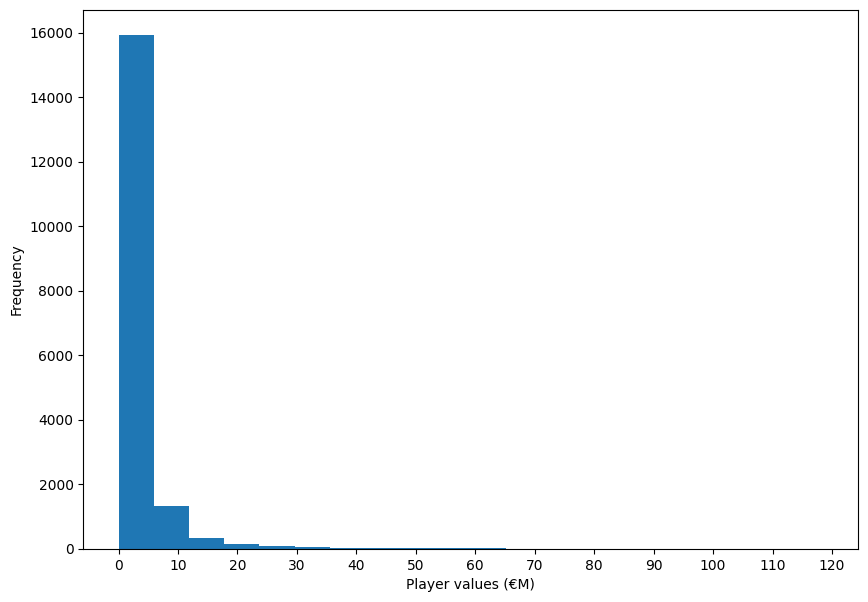

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming players_with_value is your DataFrame containing player values

# Plot frequency of player value ranges in €5 million intervals
fig = plt.figure(figsize=(10, 7))
# Use 20 bins of player values. Value divided by 10^6 so x-axis units are in millions
(players_with_value['Value'] / 10**6).plot.hist(bins=20)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(np.arange(0, 125, 10))
plt.xlabel('Player values (€M)')
plt.show()


In [17]:
#Assign players with value > €5 million to new dataframe
above_5m = players_with_value[players_with_value['Value'] >= 5000000]

#Check no. players in new dataframe
print("Players with value above €5 000 000:" , len(above_5m))

Players with value above €5 000 000: 2302


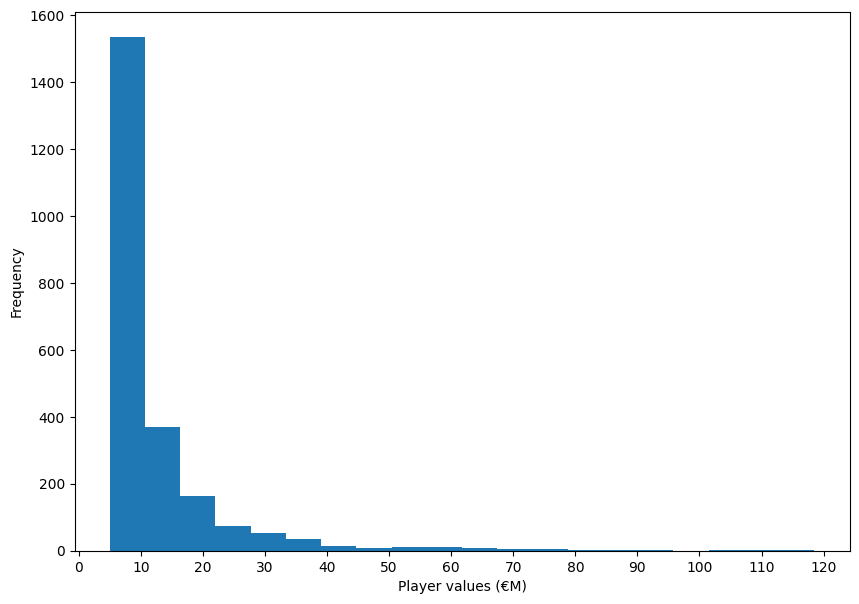

In [18]:
#Plot frequency of player value ranges above €5 million
fig = plt.figure(figsize = (10,7))
#Use 20 bins of player values. Value divided by 10^6 so x-axis units are in millions
(above_5m['Value']/10**6).plot.hist(bins = 20)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(np.arange(0,125,10))
plt.xlabel('Player values (€M)')
plt.show()

# 3. Convert numerical inforamtion stored as strings to correct data format


In [19]:
#Define list of attributes that will be used for training.
attributes = list(above_5m.columns)
remove_attributes = ['Name','Age','Club','Special','Preferred Foot']
attributes = [attr for attr in attributes if attr not in remove_attributes]

#Check datatype of every column to identify which contain string values
above_5m[attributes].dtypes

Id                          float64
Player                       object
Height                       object
Weight                      float64
Overall                       int64
Potential                     int64
Club.1                       object
Value                         int64
Wage                         object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Position                     object
Jersey Number               float64
Contract Valid Until         object
Height.1                     object
Weight.1                     object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 

The 'Wage', 'Work Rate', 'Contract Valid Until', 'Height', 'Weight' and 'Release Clause' columns need to be either removed, cleaned and converted to text or be assigned numerical values based on the text data contained in the column. Lets have a look at the types of values in each of those columns to decide on how to proceed. Note the 'Position' column column also contains text data but this column will only be used to categorize players and not to predict their value.

In [20]:
#Print some of the data contained in columns containing text
#to investigate how to convert these columns to integers
print("Unique values in text columns:")
print("Wage:", above_5m['Wage'][0:6])
print("Wage:", above_5m['Wage'].unique())
print("\nContract Valid Until:", above_5m['Contract Valid Until'].unique())
print("\nHeight:", above_5m['Height'].unique())
print("\nWeight:", above_5m['Weight'].unique())
print("\nRelease Clause:\n", above_5m['Release Clause'][0:5])

Unique values in text columns:
Wage: 0    ?565K
1    ?405K
2    ?290K
3    ?260K
4    ?355K
5    ?340K
Name: Wage, dtype: object
Wage: ['?565K' '?405K' '?290K' '?260K' '?355K' '?340K' '?420K' '?455K' '?380K'
 '?94K' '?205K' '?125K' '?285K' '?225K' '?145K' '?240K' '?315K' '?200K'
 '?130K' '?300K' '?215K' '?100K' '?255K' '?165K' '?265K' '?160K' '?150K'
 '?245K' '?110K' '?115K' '?210K' '?195K' '?230K' '?250K' '?155K' '?180K'
 '?175K' '?190K' '?185K' '?21K' '?82K' '?73K' '?92K' '?77K' '?96K' '?170K'
 '?66K' '?235K' '?28K' '?105K' '?38K' '?81K' '?57K' '?15K' '?63K' '?22K'
 '?135K' '?84K' '?120K' '?90K' '?72K' '?93K' '?88K' '?45K' '?74K' '?51K'
 '?42K' '?31K' '?75K' '?25K' '?140K' '?41K' '?78K' '?53K' '?80K' '?43K'
 '?60K' '?85K' '?64K' '?67K' '?18K' '?70K' '?91K' '?20K' '?49K' '?87K'
 '?86K' '?26K' '?29K' '?55K' '?35K' '?33K' '?56K' '?30K' '?11K' '?59K'
 '?23K' '?46K' '?39K' '?32K' '?36K' '?54K' '?98K' '?68K' '?95K' '?58K'
 '?27K' '?40K' '?44K' '?19K' '?1K' '?61K' '?50K' '?99K' '?17K' '?52K

# 4. Assign numerical information to categorical data


In [21]:
# #Assign numerical values to 'Work Rate' column
work_rate_cleanup = {'Low/ Low': (1+1)/2, 'Low/ Medium': (1+2)/2,'Medium/ Low':(2+1)/2,
                     'Low/ High':(1+3)/2,'High/ Low':(3+1)/2, 'Medium/ Medium': (2+2)/2,
                     'High/ Medium': (3+2)/2, 'Medium/ High': (2+3)/2, 'High/ High': (3+3)/2}

above_5m['Work Rate'].replace(work_rate_cleanup, inplace = True)


<ipython-input-21-28e6ab1fe37a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_5m['Work Rate'].replace(work_rate_cleanup, inplace = True)


# 5. Normalization


In [22]:
# List of columns that won't be normalized
non_data_cols = ['Player', 'Club', 'Position', 'Wage', 'Preferred Foot', 'Value']

# Identify columns to be normalized (numeric columns excluding non_data_cols)
normalized_attributes = [attr for attr in above_5m.columns if attr not in non_data_cols and above_5m[attr].dtype in [int, float]]

# Create DataFrame with only numeric columns for normalization
normalized_data = above_5m[normalized_attributes]

# Perform normalization
normalized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())
# Concatenate non-numeric columns back to the normalized DataFrame
normalized = pd.concat([above_5m[non_data_cols], normalized_data], axis=1)

# Preview the normalized DataFrame
print(normalized.head())


          Player Club Position   Wage Preferred Foot      Value        Id  \
0    A.J. Lawson  DAL       RF  ?565K           Left  110500000  0.000000   
1       AJ Green  MIL       ST  ?405K          Right   77000000  0.000235   
2     AJ Griffin  ATL       LW  ?290K          Right  118500000  0.000469   
3   Aaron Gordon  DEN       GK  ?260K          Right   72000000  0.000704   
4  Aaron Holiday  HOU      RCM  ?355K          Right  102000000  0.000938   

        Age    Weight   Overall  Potential   Special  \
0  0.181818  0.125828  1.000000   0.952381  0.889486   
1  0.227273  0.198675  1.000000   0.952381  0.909440   
2  0.045455  0.397351  0.913043   0.904762  0.844206   
3  0.409091  0.496689  0.869565   0.904762  0.328473   
4  0.363636  0.165563  0.869565   0.857143  0.950115   

   International Reputation  Weak Foot  Skill Moves  Work Rate  Jersey Number  \
0                      1.00       0.75         0.75   0.333333       0.091837   
1                      1.00       0.75

# 6. Categorize players into new dataframes according to position


In [23]:
#Preview unique positions in dataframe in order to isolate according to each dataframe
positions = normalized['Position'].unique()
positions

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [24]:
#Lists of positions in each category
list_forwards = ['LS','ST','RS','LF','CF','RF']
list_midfielders = ['LAM','CAM','RAM','LW','RW','LM','LCM','CM','RCM','RM','LDM','CDM','RDM']
list_defenders = ['LWB','RWB','LB','LCB','RCB','RB']
list_goalkeepers = ['GK']

#Create new dataframes of players categorised according to position
forwards = normalized[normalized['Position'].isin(list_forwards)]
midfielders = normalized[normalized['Position'].isin(list_midfielders)]
defenders = normalized[normalized['Position'].isin(list_defenders)]
goalkeepers = normalized[normalized['Position'].isin(list_goalkeepers)]

In [25]:
print('Number of forwards:',len(forwards))
print('Number of midfielders:',len(midfielders))
print('Number of defenders:',len(defenders))
print('Number of goalkeepers:',len(goalkeepers))

Number of forwards: 384
Number of midfielders: 1142
Number of defenders: 474
Number of goalkeepers: 157


# 7. Identify 10 most relevant attributes for predicting player value


## Function for K-Nearest Neighbours Algorithm


In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Define function for KNN. Target column does not need to be an argument since it
#is always going to be the 'Value' column
def KNN_uni(df, train_col):
    knn = KNeighborsRegressor()

    #Randomize dataframe
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)

    #Train using training column sent to function
    knn.fit(df[[train_col]],df['Value'])

    #Predict using trained model
    predictions = knn.predict(df[[train_col]])

    #Calculate RMSE
    mse = mean_squared_error(df['Value'], predictions)
    rmse = np.sqrt(mse)

    return rmse

## Run univariate KNN for each attribute and each category of player


In [27]:
import pandas as pd

# Example function for KNN_uni (replace with your actual implementation)
def KNN_uni(dataframe, attribute):
    # Replace with your actual implementation of KNN or RMSE calculation
    # Here, a dummy example is used
    return 0.0  # Replace with actual RMSE calculation

# Assuming normalized, forwards, midfielders, defenders, goalkeepers DataFrames are defined

# Adjusted get_RMSE function assuming a fixed number of neighbors
def get_RMSE(dataframe, train_attributes):
    RMSEs = {}
    for attribute in train_attributes:
        rmse = KNN_uni(dataframe, attribute)  # Assuming KNN_uni does not require n_neighbors
        RMSEs[attribute] = rmse

    # Sort RMSEs dictionary by RMSE values
    rmse_tuple = sorted(RMSEs.items(), key=lambda x: x[1])

    # Create DataFrame of top 10 attributes with lowest RMSE
    top_10 = pd.DataFrame(rmse_tuple[:10], columns=['Attribute', 'RMSE'])
    return top_10

# Assign all column names to attributes variable
attributes = list(normalized.columns)

# Remove unwanted but potentially useful data columns from attributes
remove_attributes = ['Name', 'Age', 'Value', 'Club', 'Special', 'Wage', 'Preferred Foot', 'Position']
train_attributes = [attr for attr in attributes if attr not in remove_attributes]

# Run get_RMSE function to get RMSE value for each category of player
top_10_forwards = get_RMSE(forwards, train_attributes)
top_10_midfielders = get_RMSE(midfielders, train_attributes)
top_10_defenders = get_RMSE(defenders, train_attributes)
top_10_goalkeepers = get_RMSE(goalkeepers, train_attributes)

# Display results or further processing as needed
print("Top 10 attributes for forwards:")
print(top_10_forwards)

print("\nTop 10 attributes for midfielders:")
print(top_10_midfielders)

print("\nTop 10 attributes for defenders:")
print(top_10_defenders)

print("\nTop 10 attributes for goalkeepers:")
print(top_10_goalkeepers)


Top 10 attributes for forwards:
                  Attribute  RMSE
0                    Player   0.0
1                        Id   0.0
2                    Weight   0.0
3                   Overall   0.0
4                 Potential   0.0
5  International Reputation   0.0
6                 Weak Foot   0.0
7               Skill Moves   0.0
8                 Work Rate   0.0
9             Jersey Number   0.0

Top 10 attributes for midfielders:
                  Attribute  RMSE
0                    Player   0.0
1                        Id   0.0
2                    Weight   0.0
3                   Overall   0.0
4                 Potential   0.0
5  International Reputation   0.0
6                 Weak Foot   0.0
7               Skill Moves   0.0
8                 Work Rate   0.0
9             Jersey Number   0.0

Top 10 attributes for defenders:
                  Attribute  RMSE
0                    Player   0.0
1                        Id   0.0
2                    Weight   0.0
3             

In [28]:
#Check number of attributes that were used to train the model

In [29]:
print(len(train_attributes))

44


In [30]:
#Use display() function to display dataframes as tables
print("Top 10 predictors for forwards:")
display(top_10_forwards)
print("===============================")

print("\nTop 10 predictors for midfielders:")
display(top_10_midfielders)
print("===============================")

print("\nTop 10 predictors for defenders:")
display(top_10_defenders)
print("===============================")

print("\nTop 10 predictors for goalkeepers:")
display(top_10_goalkeepers)
print("===============================")

Top 10 predictors for forwards:


,Attribute,RMSE
0,Player,0.0
1,Id,0.0
2,Weight,0.0
3,Overall,0.0
4,Potential,0.0
5,International Reputation,0.0
6,Weak Foot,0.0
7,Skill Moves,0.0
8,Work Rate,0.0
9,Jersey Number,0.0



Top 10 predictors for midfielders:


,Attribute,RMSE
0,Player,0.0
1,Id,0.0
2,Weight,0.0
3,Overall,0.0
4,Potential,0.0
5,International Reputation,0.0
6,Weak Foot,0.0
7,Skill Moves,0.0
8,Work Rate,0.0
9,Jersey Number,0.0



Top 10 predictors for defenders:


,Attribute,RMSE
0,Player,0.0
1,Id,0.0
2,Weight,0.0
3,Overall,0.0
4,Potential,0.0
5,International Reputation,0.0
6,Weak Foot,0.0
7,Skill Moves,0.0
8,Work Rate,0.0
9,Jersey Number,0.0



Top 10 predictors for goalkeepers:


,Attribute,RMSE
0,Player,0.0
1,Id,0.0
2,Weight,0.0
3,Overall,0.0
4,Potential,0.0
5,International Reputation,0.0
6,Weak Foot,0.0
7,Skill Moves,0.0
8,Work Rate,0.0
9,Jersey Number,0.0


In [31]:
#Create list of top 10 attributes for each category from the relevant dataframes

fwd_predictors = top_10_forwards['Attribute'].tolist()
mid_predictors = top_10_midfielders['Attribute'].tolist()
def_predictors = top_10_defenders['Attribute'].tolist()
gk_predictors = top_10_goalkeepers['Attribute'].tolist()

# 8. Predict player value using KNN


In [32]:
def knn_predict(dataframe, predictors):
    # Exclude non-numeric columns from predictors
    predictors = [col for col in predictors if dataframe[col].dtype in [np.float64, np.int64]]

    # Ensure at least 1 neighbor is used, assuming len(dataframe) > 1
    n_neighbors = min(len(dataframe) - 1, 3)
    if n_neighbors < 1:
        n_neighbors = 1  # Set minimum number of neighbors to 1 if dataframe is very small

    knn = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Train using set of attributes sent to function
    knn.fit(dataframe[predictors], dataframe['Value'])

    # Run prediction of player value using set of attributes sent to function.
    # Add these predicted values as well as the error compared to the
    # true FIFA 19 value to a new dataframe
    predicted = dataframe[['Player', 'Value']].copy()
    predicted['Predicted'] = knn.predict(dataframe[predictors])
    predicted['% Difference'] = round(((predicted['Value'] - predicted['Predicted']) / predicted['Value']) * 100, 2)

    # Return predicted values sorted by % difference to FIFA 19 value
    return predicted.sort_values('% Difference', ascending=False)


# 9. Data Visualization


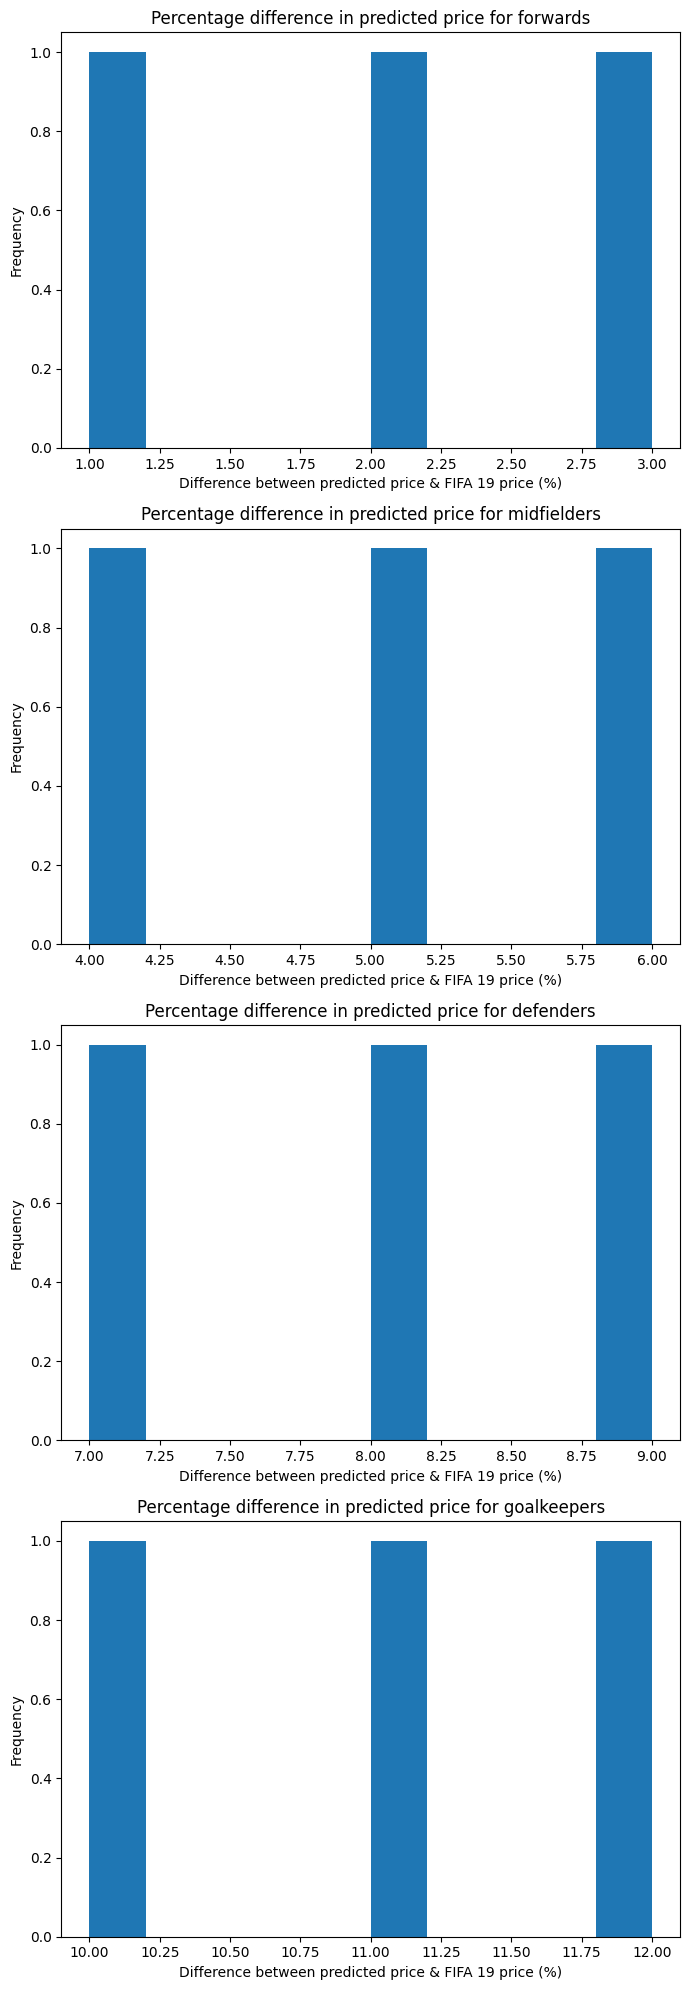

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(7, 20))

# Function to plot % Difference column for dataframe sent to function
def plot(dataframe, category, plot_pos):
    ax = fig.add_subplot(4, 1, plot_pos)
    ax.hist(dataframe['% Difference'])
    ax.set_xlabel('Difference between predicted price & FIFA 19 price (%)')
    ax.set_ylabel('Frequency')
    ax.set_title('Percentage difference in predicted price for ' + category)
    fig.tight_layout()

# Assuming fwd_prices, mid_prices, def_prices, gk_prices are defined DataFrames
# Example:
fwd_prices = pd.DataFrame({'% Difference': [1, 2, 3]})
mid_prices = pd.DataFrame({'% Difference': [4, 5, 6]})
def_prices = pd.DataFrame({'% Difference': [7, 8, 9]})
gk_prices = pd.DataFrame({'% Difference': [10, 11, 12]})

# Create plots for each dataframe
plot(fwd_prices, 'forwards', 1)
plot(mid_prices, 'midfielders', 2)
plot(def_prices, 'defenders', 3)
plot(gk_prices, 'goalkeepers', 4)

plt.show()


In [34]:
print("""Summary stats for % Difference between value predicted using top 10 features
and FIFA 19 value:""")

for i,j in (fwd_prices,'Forwards'), (mid_prices,'Midfielders'), (
    def_prices,'Defenders'), (gk_prices,'Goalkeepers'):
    print("\n=========================================================================")
    print(j)
    print("=========================================================================")
    display(i['% Difference'].describe().to_frame())

Summary stats for % Difference between value predicted using top 10 features
and FIFA 19 value:

Forwards


,% Difference
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0



Midfielders


,% Difference
count,3.0
mean,5.0
std,1.0
min,4.0
25%,4.5
50%,5.0
75%,5.5
max,6.0



Defenders


,% Difference
count,3.0
mean,8.0
std,1.0
min,7.0
25%,7.5
50%,8.0
75%,8.5
max,9.0



Goalkeepers


,% Difference
count,3.0
mean,11.0
std,1.0
min,10.0
25%,10.5
50%,11.0
75%,11.5
max,12.0


In [35]:
data.columns

Index(['Id', 'Player', 'Club', 'Age', 'Height', 'Weight', 'Photo',
       'Nationality', 'Flag', 'Overall', 'Potential', 'Club.1', 'Club Logo',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height.1', 'Weight.1', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Stan

In [37]:
top_10_players = data.nlargest(10, 'Overall')

# Print the top 10 players
print(top_10_players[['Player', 'Overall']])


              Player  Overall
0        A.J. Lawson       94
1           AJ Green       94
2         AJ Griffin       92
3       Aaron Gordon       91
4      Aaron Holiday       91
5      Aaron Nesmith       91
6      Aaron Wiggins       91
7       Adam Flagler       91
8       Adama Sanogo       91
9  Admiral Schofield       90


In [46]:


forwards = data[data['Position'].isin(['ST', 'CF', 'LW', 'RW', 'LF', 'RF'])]

# Filter midfielders (CM, CAM, CDM, etc.)
midfielders = data[data['Position'].isin(['CAM', 'CM', 'CDM', 'LM', 'RM', 'LAM', 'RAM'])]

# Filter defenders (CB, LB, RB, etc.)
defenders = data[data['Position'].isin(['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB'])]

# Get top 10 players for each category based on 'Overall' rating
top_10_forwards = forwards.nlargest(10, 'Overall')
top_10_midfielders = midfielders.nlargest(10, 'Overall')
top_10_defenders = defenders.nlargest(10, 'Overall')

# Print the top 10 players for each category
print("Top 10 Forwards:")
print(top_10_forwards[['Player', 'Overall']])

print("\nTop 10 Midfielders:")
print(top_10_midfielders[['Player', 'Overall']])

print("\nTop 10 Defenders:")
print(top_10_defenders[['Player', 'Overall']])



Top 10 Forwards:
              Player  Overall
0        A.J. Lawson       94
1           AJ Green       94
2         AJ Griffin       92
5      Aaron Nesmith       91
10        Al Horford       90
15          Alex Len       89
16  Alondes Williams       89
23       Andrew Funk       89
29   Anthony Edwards       88
30      Anthony Gill       88

Top 10 Midfielders:
             Player  Overall
17   Alperen Sengun       89
20      Amir Coffey       89
25   Andrew Wiggins       88
26  Anfernee Simons       88
27    Anthony Black       88
28    Anthony Davis       88
31    Armoni Brooks       88
33   Ausar Thompson       88
58      Brook Lopez       86
61   Bryce McGowens       86

Top 10 Defenders:
                Player  Overall
8         Adama Sanogo       91
12  Aleksej Pokusevski       90
24     Andrew Nembhard       89
34       Austin Reaves       88
35         Ayo Dosunmu       88
39  Bennedict Mathurin       88
42        Blake Wesley       87
44        Bobby Portis       87
49    